# Ejercicios

En estos usaremos el conjunto de datos que guardamos ayer en los ejercicios de la clase invertida. Los ejercicios que os planteamos hoy son: 


1. Total de unidades vendidas por país de origen del vendedor. Debéis agrupar los datos según el país de origen del vendedor y calcular el total de unidades vendidas para cada país. Esto nos dará una idea de qué países tienen una mayor participación en las ventas totales y cuáles tienen menos. Devuelve los resultados en un DataFrame ordenados de mayor a menor en función de la cantidad de unidades vendidas. 

2. Estadísticas de precio por país de envío. Vamos a explorar el precio promedio y el precio máximo de los productos según el país al que se envían. Al hacer esto, podremos entender cómo varían los precios según el destino del envío y si hay alguna tendencia interesante que valga la pena analizar.  Devuelve los resultados en un DataFrame. 

3. Conteo de productos con y sin distintivo de producto local. Vamos a clasificar los productos según si tienen o no un distintivo de producto local. Luego, calcularemos el conteo de productos en cada categoría para comprender cuántos productos tienen este distintivo y cuántos no. Esto puede proporcionarnos información sobre cómo se promocionan los productos con esta característica. Devuelve los resultados en un DataFrame. 

4. Promedio de unidades vendidas por tipo de envío. Nuestro objetivo es analizar cómo se correlaciona el tipo de envío (columna `shipping_option_name` ) con las unidades vendidas. Vamos a calcular el promedio de unidades vendidas para cada tipo de opción de envío. Esto podría ayudarnos a determinar si ciertos métodos de envío están relacionados con un mayor o menor rendimiento en las ventas. Devuelve los resultados en un DataFrame.  ¿Qué conclusiones puedes sacar de este resultado?

5. Reemplazo de valores. A lo largo del DataFrame tenemos algunas columnas cuyos valores son cero y uno, lo que podría llevar a confusión en su interpretación. Estas columnas son: 

    - `uses_ad_boosts`: La cual indica si la plataforma de comercio electrónico ha utilizado o no la función de impulso de anuncios.  Si el valor de uses_ad_boosts es 1, indica que el vendedor ha invertido en publicidad adicional para resaltar el producto. Si el valor es 0, no ha sido promocionado a través de anuncios adicionales.

    - `badge_local_product`: Indica que el producto se produce, fabrica o se envía desde la misma región o país en el que se realiza la transacción de compra. Si el valor es 1, significa que el producto tiene un distintivo que lo califica como un producto local. Si el valor es 0, indica que el producto no tiene este distintivo.

    - `badge_product_quality`: Indica que el producto cumple con ciertos estándares de calidad, características o evaluaciones positivas por parte de los consumidores. Si el valor es 1, significa que el producto tiene un distintivo que lo califica como un producto de alta calidad. Si el valor es 0, indica que el producto no tiene este distintivo de calidad.

    - `badge_fast_shipping`: Indica que el producto se enviará y entregará en un plazo más corto en comparación con otras opciones de envío estándar. Si el valor es 1, significa que el producto tiene un distintivo que indica un envío rápido. Si el valor es 0, indica que el producto no tiene este distintivo de envío rápido.

    - `shipping_is_express`: Se refiere a si una opción de envío para un producto en una plataforma de comercio electrónico se considera como "envío exprés" o "envío rápido". Si el valor es 1, significa que la opción de envío asociada se considera como una entrega rápida o exprés. Si el valor es 0, indica que la opción de envío no se considera como envío exprés.

    Todas estas columnas cumplen un patrón, y es que los 0 corresponden con 'No' y los 1 con 'Si'. Por esto, en este ejercicio deberéis reemplazar los 0: No y los 1: Si. 


6. Calificación de la calidad del producto. Sobreescribe la columna `badge_product_quality`  utilizando `apply()` para asignar "Buena" a las filas donde 'badge_product_quality' sea "No" y "Excelente" donde sea "Si".


7. Cálculo de descuento. Crea una nueva columna `discount_percentage` utilizando `apply()` que calcule el porcentaje de descuento  basado en las columnas 'price' y 'retail_price', redondea los decimales a 2. Después elimina las columnas de `average_discount` y `mean_discount` 

8. Evaluación de la valoración del vendedor. Utiliza `apply()` para crear una nueva columna 'seller_reputation' donde los valores sean "Buena" si 'merchant_rating' es mayor o igual a 4, y "Regular" si es menor a 4. Después elimina la columna `merchant_rating`. 

9. Guarda los resultados en un DataFrame para usarlo en la próxima lección. 


In [20]:
import pandas as pd
import numpy as np
import re
pd.set_option('display.max_columns', None)

In [61]:
df = pd.read_csv('df-rating-insight-leccion-04.csv')
df.head(1)

,Unnamed: 0,index,merchant_id,listed_products,total_units_sold,mean_units_sold_per_product,rating,merchant_ratings_count,mean_product_prices,mean_retail_prices,average_discount,mean_discount,mean_product_ratings_count,index_r,title,title_orig,price,retail_price,units_sold,uses_ad_boosts,rating_r,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,origin_country,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id.1,merchant_profile_picture,product_url,product_id
0,0,0,5357bcf2bb72c5504882e889,2,120000,60000.0,4.219,320031.0,9.0,20.0,54.0,54.0,8836.0,1018,Femmes dentelle manches courtes hauts hauts ch...,Women Lace Short Sleeve Long Tops Blouse Shirt...,7.0,22,100000,1,3.82,11913,5355.0,2430.0,1974.0,960.0,1194.0,0,0,0,"blouse,Fashion,Shirt,boho,Tops,summer t-shirts...",NaN,S,Livraison standard,2,0,46,50,CN,primesalecolimited,90 % avis positifs,320031,4.218866,5357bcf2bb72c5504882e889,https://s3-us-west-1.amazonaws.com/sweeper-pro...,https://www.wish.com/c/567cb0925ff12c4829f07dfb,567cb0925ff12c4829f07dfb


1. Total de unidades vendidas por país de origen del vendedor. Debéis agrupar los datos según el país de origen del vendedor y calcular el total de unidades vendidas para cada país. Esto nos dará una idea de qué países tienen una mayor participación en las ventas totales y cuáles tienen menos. Devuelve los resultados en un DataFrame ordenados de mayor a menor en función de la cantidad de unidades vendidas. 

In [23]:
total_unid_pais = df.groupby('origin_country')['total_units_sold'].sum().reset_index() # .reset_index() restablece el índice del DataFrame agrupado para que origin_country sea una columna.
total_unid_pais = total_unid_pais.sort_values(by='total_units_sold', ascending=False) # .sort_values() método de pandas que ordena una Serie
total_unid_pais

,origin_country,total_units_sold
1,CN,17371643
4,US,60460
3,SG,40200
2,GB,1000
5,VE,650
0,AT,100


2. Estadísticas de precio por país de envío. Vamos a explorar el precio promedio y el precio máximo de los productos según el país al que se envían. Al hacer esto, podremos entender cómo varían los precios según el destino del envío y si hay alguna tendencia interesante que valga la pena analizar.  Devuelve los resultados en un DataFrame. 

In [26]:
df_pais_precio = df.groupby('countries_shipped_to')['price'].agg(['mean', 'max']).reset_index()
df_pais_precio 

,countries_shipped_to,mean,max
0,6,6.000000,6.0
1,8,5.298333,6.0
2,9,6.707500,8.0
3,10,12.111429,18.0
4,11,8.500000,12.0
...,...,...,...
89,135,5.355000,7.0
90,137,8.243333,11.0
91,138,6.036667,9.0
92,139,8.975000,13.0


3. Conteo de productos con y sin distintivo de producto local. Vamos a clasificar los productos según si tienen o no un distintivo de producto local. Luego, calcularemos el conteo de productos en cada categoría para comprender cuántos productos tienen este distintivo y cuántos no. Esto puede proporcionarnos información sobre cómo se promocionan los productos con esta característica. Devuelve los resultados en un DataFrame. 

In [30]:
df_distintivo_local = df.groupby('badge_local_product')['product_id'].count().reset_index()
df_distintivo_local

,badge_local_product,product_id
0,0,1544
1,1,29


Cambio nombre de segunda columna para mayor claridad:

In [31]:
df_distintivo_local = df_distintivo_local.rename(columns={'product_id': 'product_count'})
df_distintivo_local 

,badge_local_product,product_count
0,0,1544
1,1,29


4. Promedio de unidades vendidas por tipo de envío. Nuestro objetivo es analizar cómo se correlaciona el tipo de envío (columna `shipping_option_name` ) con las unidades vendidas. Vamos a calcular el promedio de unidades vendidas para cada tipo de opción de envío. Esto podría ayudarnos a determinar si ciertos métodos de envío están relacionados con un mayor o menor rendimiento en las ventas. Devuelve los resultados en un DataFrame.  ¿Qué conclusiones puedes sacar de este resultado?

In [32]:
df_avg_unid_envio = df.groupby('shipping_option_name')['total_units_sold'].mean().reset_index()
df_avg_unid_envio

,shipping_option_name,total_units_sold
0,Ekspresowa wysyłka,10000.000000
1,Envio Padrão,12177.777778
2,Envío normal,16220.000000
3,Expediere Standard,900.000000
4,Livraison Express,400.000000
5,Livraison standard,11359.020557
6,Spedizione standard,550.000000
7,Standard Shipping,9650.000000
8,Standardowa wysyłka,27733.333333
9,Standardversand,6766.666667


In [34]:
df_avg_unid_envio = df_avg_unid_envio.rename(columns={'total_units_sold': 'average_units_sold'})
df_avg_unid_envio 

,shipping_option_name,average_units_sold
0,Ekspresowa wysyłka,10000.000000
1,Envio Padrão,12177.777778
2,Envío normal,16220.000000
3,Expediere Standard,900.000000
4,Livraison Express,400.000000
5,Livraison standard,11359.020557
6,Spedizione standard,550.000000
7,Standard Shipping,9650.000000
8,Standardowa wysyłka,27733.333333
9,Standardversand,6766.666667


5. Reemplazo de valores. A lo largo del DataFrame tenemos algunas columnas cuyos valores son cero y uno, lo que podría llevar a confusión en su interpretación.

In [62]:
c_remplazar = ['uses_ad_boosts', 'badge_local_product', 'badge_product_quality','badge_fast_shipping', 'shipping_is_express']

df[c_remplazar] = df[c_remplazar].replace({0: 'No', 1: 'Si'})
df[['uses_ad_boosts', 'badge_local_product', 'badge_product_quality','badge_fast_shipping', 'shipping_is_express']].sample(5)

,uses_ad_boosts,badge_local_product,badge_product_quality,badge_fast_shipping,shipping_is_express
616,Si,No,No,No,No
297,No,No,No,No,No
834,Si,No,No,No,No
885,No,No,No,No,No
606,Si,No,No,No,No


6. Calificación de la calidad del producto. Sobreescribe la columna `badge_product_quality`  utilizando `apply()` para asignar "Buena" a las filas donde 'badge_product_quality' sea "No" y "Excelente" donde sea "Si".

In [63]:
df['badge_product_quality'].unique()

array(['No', 'Si'], dtype=object)

Creo funcion para poder usar .apply():

In [64]:
def calificar_calidad(valor):
    if valor == 'No':
        return 'Buena'
    elif valor == 'Si':
        return 'Excelente' 

Aplico la función a la columna 'badge_product_quality':

In [65]:
df['badge_product_quality'] = df['badge_product_quality'].apply(calificar_calidad)
df['badge_product_quality'].unique()

array(['Buena', 'Excelente'], dtype=object)

7. Cálculo de descuento. Crea una nueva columna `discount_percentage` utilizando `apply()` que calcule el porcentaje de descuento  basado en las columnas 'price' y 'retail_price', redondea los decimales a 2. Después elimina las columnas de `average_discount` y `mean_discount` 

![Captura de pantalla 2024-05-27 a las 0.04.18.png](<attachment:Captura de pantalla 2024-05-27 a las 0.04.18.png>)
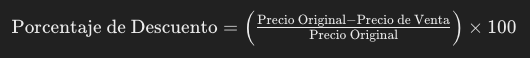

In [68]:
def calcular_descuento(fila):
    return round(((fila['retail_price'] - fila['price']) / fila['retail_price']) * 100, 2)  # método .round() redondea decimales.

Aplico funcion para crear nueva columna 'discount_percentage':

In [69]:
df['discount_percentage'] = df.apply(calcular_descuento, axis=1) # Uso axis = 1 para crear columna
df['discount_percentage']

0       68.18
1       38.89
2       80.00
3      -14.29
4       62.16
        ...  
1568   -10.00
1569     0.00
1570    69.78
1571     0.00
1572    63.33
Name: discount_percentage, Length: 1573, dtype: float64

Elimino columnas 'average_discount' y 'mean_discount':

In [70]:
df = df.drop(columns=['average_discount', 'mean_discount'])
df.columns

Index(['Unnamed: 0', 'index', 'merchant_id', 'listed_products',
       'total_units_sold', 'mean_units_sold_per_product', 'rating',
       'merchant_ratings_count', 'mean_product_prices', 'mean_retail_prices',
       'mean_product_ratings_count', 'index_r', 'title', 'title_orig', 'price',
       'retail_price', 'units_sold', 'uses_ad_boosts', 'rating_r',
       'rating_count', 'rating_five_count', 'rating_four_count',
       'rating_three_count', 'rating_two_count', 'rating_one_count',
       'badge_local_product', 'badge_product_quality', 'badge_fast_shipping',
       'tags', 'product_color', 'product_variation_size_id',
       'shipping_option_name', 'shipping_option_price', 'shipping_is_express',
       'countries_shipped_to', 'inventory_total', 'origin_country',
       'merchant_name', 'merchant_info_subtitle', 'merchant_rating_count',
       'merchant_rating', 'merchant_id.1', 'merchant_profile_picture',
       'product_url', 'product_id', 'discount_percentage'],
      dtype='obje

8. Evaluación de la valoración del vendedor. Utiliza `apply()` para crear una nueva columna 'seller_reputation' donde los valores sean "Buena" si 'merchant_rating' es mayor o igual a 4, y "Regular" si es menor a 4. Después elimina la columna `merchant_rating`. 

Primero creo funcion para poder usar .apply()

In [72]:
def reputacion(valor):
    if valor >= 4:
        return 'Buena'
    else:
        return 'Regular'

Aplico la función para crear la columna 'seller_reputation':

In [73]:
df['seller_reputation'] = df['merchant_rating'].apply(reputacion)
df['seller_reputation'].unique()

array(['Buena', 'Regular'], dtype=object)

Elimino  la columna 'merchant_rating':

In [74]:
df = df.drop(columns=['merchant_rating'])
df.columns

Index(['Unnamed: 0', 'index', 'merchant_id', 'listed_products',
       'total_units_sold', 'mean_units_sold_per_product', 'rating',
       'merchant_ratings_count', 'mean_product_prices', 'mean_retail_prices',
       'mean_product_ratings_count', 'index_r', 'title', 'title_orig', 'price',
       'retail_price', 'units_sold', 'uses_ad_boosts', 'rating_r',
       'rating_count', 'rating_five_count', 'rating_four_count',
       'rating_three_count', 'rating_two_count', 'rating_one_count',
       'badge_local_product', 'badge_product_quality', 'badge_fast_shipping',
       'tags', 'product_color', 'product_variation_size_id',
       'shipping_option_name', 'shipping_option_price', 'shipping_is_express',
       'countries_shipped_to', 'inventory_total', 'origin_country',
       'merchant_name', 'merchant_info_subtitle', 'merchant_rating_count',
       'merchant_id.1', 'merchant_profile_picture', 'product_url',
       'product_id', 'discount_percentage', 'seller_reputation'],
      dtype='ob

In [75]:
df = df.to_csv('df-rating-insight-leccion-05.csv')